# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [451]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [452]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [453]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


Text(0.5,1,'Median Home Value Histogram')

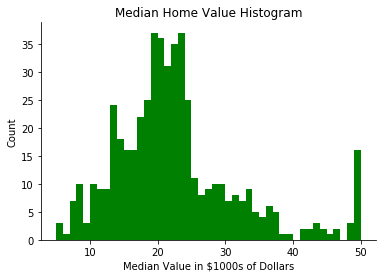

In [454]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.hist(bdata.target, bins=np.arange(min(bdata.target), max(bdata.target) + 1, 1), color = 'green', edgecolor = 'none')

# remove top and right borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off

# add labels
plt.gca().set_xlabel('Median Value in $1000s of Dollars')
plt.gca().set_ylabel('Count')
plt.gca().set_title('Median Home Value Histogram')

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Text(0.5,1,'Per capita crime rate vs median home values')

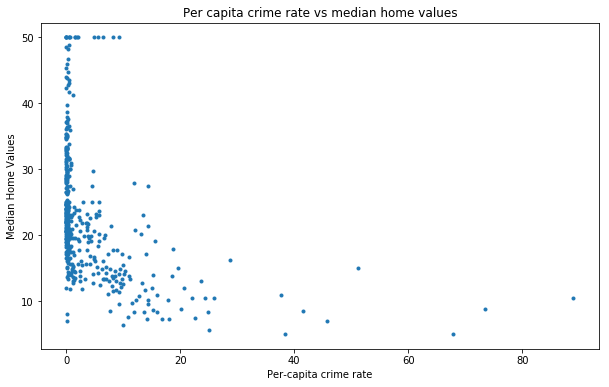

In [455]:
%matplotlib inline 
df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
df['target'] = bdata.target
plt.figure(figsize=(10,6))
plt.scatter(df['CRIM'],df['target'],marker = ".")
plt.ylabel('Median Home Values')
plt.xlabel('Per-capita crime rate')
plt.title("Per capita crime rate vs median home values")


###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Text(0.5,1,'% lower status of the population vs median home values')

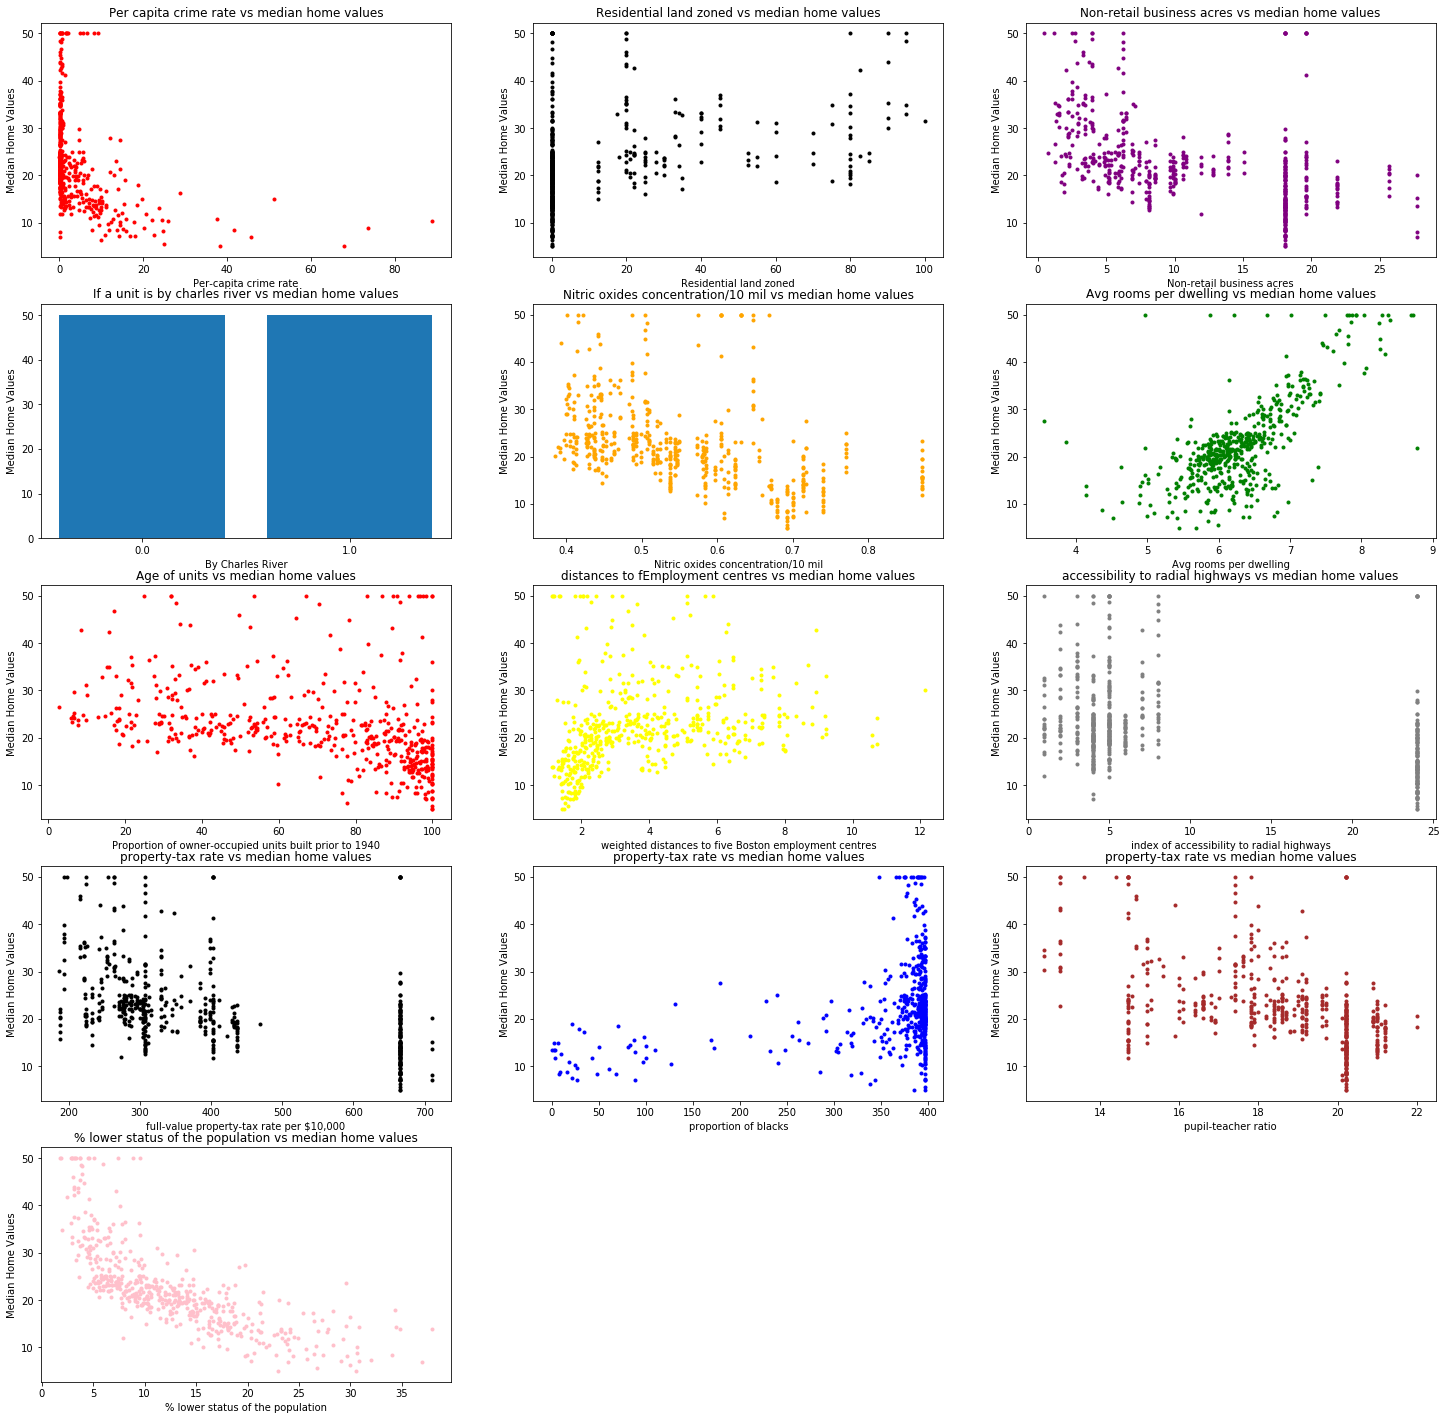

In [456]:
# enter your code here
CHAS_dummies = pd.get_dummies(df.CHAS, prefix='CHAS')
df = pd.concat([df, CHAS_dummies], axis=1)
from pylab import rcParams 
rcParams['figure.figsize'] = 25,25
df['CHAS'] = df['CHAS'].astype(str)

fig = plt.figure() 
ax1 = fig.add_subplot(5,3,1) 
plt.scatter(df['CRIM'],df['target'],marker = ".", c = "red")
plt.ylabel('Median Home Values')
plt.xlabel('Per-capita crime rate')
plt.title("Per capita crime rate vs median home values")

ax2 = fig.add_subplot(5,3,2) 
plt.scatter(df['ZN'],df['target'],marker = ".", c = "black")
plt.ylabel('Median Home Values')
plt.xlabel('Residential land zoned')
plt.title("Residential land zoned vs median home values")
 
ax3 = fig.add_subplot(5,3,3) 
plt.scatter(df['INDUS'],df['target'], marker = ".", c = "purple")
plt.ylabel('Median Home Values')
plt.xlabel('Non-retail business acres')
plt.title("Non-retail business acres vs median home values")
 
ax4 = fig.add_subplot(5,3,4) 
plt.bar(df['CHAS'],df['target'])
plt.ylabel('Median Home Values')
plt.xlabel('By Charles River')
plt.title("If a unit is by charles river vs median home values")

ax5 = fig.add_subplot(5,3,5) 
plt.scatter(df['NOX'],df['target'],marker = ".", c = "orange")
plt.ylabel('Median Home Values')
plt.xlabel('Nitric oxides concentration/10 mil')
plt.title("Nitric oxides concentration/10 mil vs median home values")

ax6 = fig.add_subplot(5,3,6) 
plt.scatter(df['RM'],df['target'], marker = ".", c = "green")
plt.ylabel('Median Home Values')
plt.xlabel('Avg rooms per dwelling')
plt.title("Avg rooms per dwelling vs median home values")

ax7 = fig.add_subplot(5,3,7) 
plt.scatter(df['AGE'],df['target'],marker = ".", c = "red")
plt.ylabel('Median Home Values')
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.title("Age of units vs median home values")
 
ax8 = fig.add_subplot(5,3,8) 
plt.scatter(df['DIS'],df['target'],marker = ".", c = "yellow")
plt.ylabel('Median Home Values')
plt.xlabel('weighted distances to five Boston employment centres')
plt.title("distances to fEmployment centres vs median home values")

ax10 = fig.add_subplot(5,3,9) 
plt.scatter(df['RAD'],df['target'], marker = ".", c = "grey")
plt.ylabel('Median Home Values')
plt.xlabel('index of accessibility to radial highways')
plt.title("accessibility to radial highways vs median home values")

ax11 = fig.add_subplot(5,3,10) 
plt.scatter(df['TAX'],df['target'], marker = ".", c = "black")
plt.ylabel('Median Home Values')
plt.xlabel('full-value property-tax rate per $10,000')
plt.title("property-tax rate vs median home values")
           
ax12 = fig.add_subplot(5,3,11) 
plt.scatter(df['B'],df['target'], marker = ".", c = "blue")
plt.ylabel('Median Home Values')
plt.xlabel('proportion of blacks')
plt.title("property-tax rate vs median home values")           

ax12 = fig.add_subplot(5,3,12) 
plt.scatter(df['PTRATIO'],df['target'],marker = ".", c = "brown")
plt.ylabel('Median Home Values')
plt.xlabel('pupil-teacher ratio')
plt.title("property-tax rate vs median home values") 

ax12 = fig.add_subplot(5,3,13) 
plt.scatter(df['LSTAT'],df['target'],marker = ".", c = "pink")
plt.ylabel('Median Home Values')
plt.xlabel('% lower status of the population')
plt.title("% lower status of the population vs median home values")  

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [457]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
def compute_rmse(predictions, yvalues):
    from math import sqrt
    from sklearn import metrics
    rmse = sqrt(metrics.mean_squared_error(yvalues, predictions))
    return rmse

compute_rmse((2,2,3),(0,2,6))
    

2.0816659994661326

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [458]:
# leave the following line untouched, 
#it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
df['rand'] = (np.random.uniform(0,1,506))
df['train'] = (df['rand']>.333)
df_test = df[df.train == False]
df_train = df[df.train == True]

In [459]:
print(df.shape,df_test.shape,df_train.shape)

(506, 18) (173, 18) (333, 18)


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [460]:
# applying mean value to train set
df_train['mean_of_test'] = df_train.apply(lambda row: np.mean(df_train['target']), axis=1)
#train set rmse
rmse_train = compute_rmse(df_train['mean_of_test'], df_train['target'])
# applying mean value to test set
df_test['mean_of_test'] = df_test.apply(lambda row: np.mean(df_train['target']), axis=1)
#train set rmse
rmse_test = compute_rmse(df_test['mean_of_test'], df_test['target'])

print ("rmse_train = ",rmse_train, "rmse_test = ",rmse_test)


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


rmse_train =  9.801241657653657 rmse_test =  7.896861220007519


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


They are not too far off, the difference is about 2.
Intuition:
We are basically measuring centrality of the two sets' targets, based on the train set target mean. In a way we are calculating variances. The below histograms showed that the two target centruality (distribution) is very similar, we then can assume the mean square errors would be same as well. 

(array([ 13.,  37.,  58.,  97.,  50.,  25.,  22.,   5.,   8.,  18.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

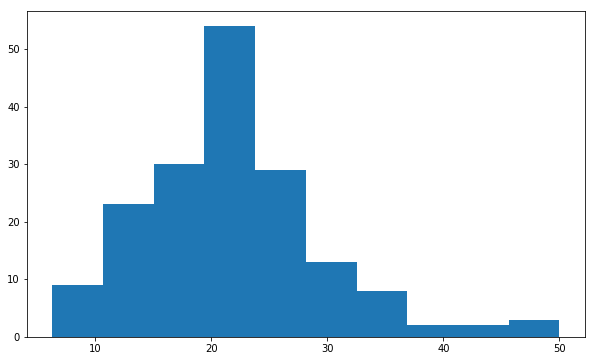

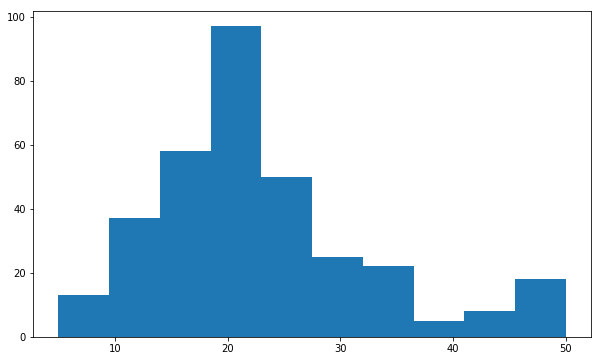

In [461]:
plt.figure(figsize=(10,6))
plt.hist(df_test['target'])
plt.figure(figsize=(10,6))
plt.hist(df_train['target'])

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [462]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
5

"""
def distance(x1, x2, L):
    x1 = np.array(x1)
    x2 = np.array(x2)
    dist = np.linalg.norm((x1 - x2), ord=L)
    return dist

print (distance((3,4),(6,8),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Time taken: 23.2 seconds


6.77

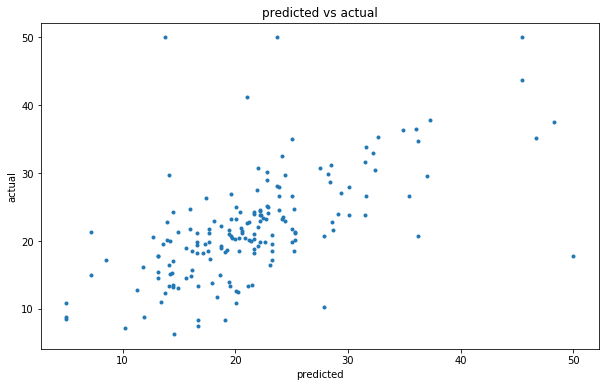

In [463]:
"""
Function
--------
nneighbor_no_nor

Given two datasets with features seleted and a value for L, 
return the RMSE for predicted target vs. actual

Parameters
----------
X_train, X_test: dataframe
    the dataframe for the features split by train and test

L: int
    Value of L to use in computing distances

rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> 
#Example:
nneighbor(X_train, X_test, 2)
Time taken: 22.34 seconds
6.77
"""

def nneighbor_no_nor(X_train, X_test, L):
    start_time = time.time()
    ind_test = X_test.index.values
    Y_test_real = df['target'].iloc[ind_test]
    X_train= X_train.reset_index()
    X_test= X_test.reset_index()
    predictions = []
    #for every instance get distance
    for x in range(len(X_test)):
        distances = []
        for i in range(len(X_train)):
            dist = distance(X_test.loc[x], X_train.loc[i], L)
            distances.append((i, dist))

        distances.sort(key=operator.itemgetter(1))
        target=df_train_copy.target[distances[0][0]]   
        predictions.append(target)

    rmse = compute_rmse(predictions,Y_test_real)
    plt.figure(figsize=(10,6))
    plt.scatter(df_test_copy['predictions'],df_test_copy['target'],marker = ".")
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title("predicted vs actual")
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return round(rmse,2)

#Example:
x_train = df_train[['CRIM','RM']]
x_test = df_test[['CRIM','RM']]
nneighbor_no_nor(x_train, x_test, 2)

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [464]:
"""
Function
--------
normalize

Given an array of numeric values, return an array of normalized values, using the formula: (mean/standard deviation)

Parameters
----------
raw_data: array
    Dataframes of each of the N observations, split into training and test

Example
-------
>>> x = [0,1,4,4,10]
>>> print normalize(x)
[-1.0897247358851685,
 -0.80295506854696619,
 0.057353933467640499,
 0.057353933467640499,
 1.7779719374968539]
"""

def normalize(raw_data):
    data_mean = np.mean(raw_data)
    data_std = np.std(raw_data)
    normalized_data = [(r- data_mean) / data_std for r in raw_data]
    return normalized_data

def nneighbor(X_train, X_test, L):
    #data normalization
    X_train.apply(normalize)
    X_test.apply(normalize)
    start_time = time.time() #start clock
    #get test ys
    ind_test = X_test.index.values
    Y_test_real = df['target'].iloc[ind_test]
    X_train= X_train.reset_index()
    X_test= X_test.reset_index()
    predictions = []
    #for every instance get distance
    for x in range(len(X_test)):
        distances = []
        for i in range(len(X_train)):
            dist = distance(X_test.loc[x], X_train.loc[i], L)
            distances.append((i, dist))
        #return index of min distance
        distances.sort(key=operator.itemgetter(1))
        target=df_train_copy.target[distances[0][0]]   
        predictions.append(target)
    
    rmse = compute_rmse(predictions,Y_test_real)
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return round(rmse,2)


x_train = df_train[['CRIM','RM']]
x_test = df_test[['CRIM','RM']]
nneighbor(x_train, x_test,2)                 

Time taken: 21.6 seconds


6.77

Since the essence of bnn is distance comparison, so scaling is extremly important. I am surprised that in this case however it didn't make much of a difference for rmse. I think this might be because we normalized test instead of using the train set normalization results. (to be tested)

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [465]:
#different 2 features
x_train = df_train[['INDUS','RAD']]
x_test = df_test[['INDUS','RAD']] 
print("RMSE: ", nneighbor(X_train, X_test, 2))

#more than 4 features
x_train = df_train[['INDUS','RAD','CRIM','LSTAT']]
x_test = df_test[['INDUS','RAD','CRIM','LSTAT']]
print("RMSE: ", nneighbor(X_train, X_test, 2))

#all non catagorical features
x_train = df_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
x_test = df_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
print("RMSE: ", nneighbor(X_train, X_test, 2))

#different L
x_train = df_train[['INDUS','RAD','CRIM','LSTAT']]
x_test = df_test[['INDUS','RAD','CRIM','LSTAT']]
print("RMSE: ", nneighbor(X_train, X_test, 5))

#all non catagorical features + different L
x_train = df_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
x_test = df_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
print("RMSE: ", nneighbor(X_train, X_test, 10))

Time taken: 22.2 seconds
RMSE:  10.24
Time taken: 22.1 seconds
RMSE:  10.24
Time taken: 21.41 seconds
RMSE:  10.24
Time taken: 24.34 seconds
RMSE:  10.39
Time taken: 23.46 seconds
RMSE:  10.09


adding more features doesn't increase runtime significantly, and in the second case it decreased the run time. A higher L returned better result, but not in a significant way. What's interesting is the RMSE is actually all larger than the origional model with just CRIM and RM. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [466]:
"""
Function
--------
crossval

Given a pandas dataframe sliced on features of interest, a value for L, and the number of foldsreturn the mean RMSE for a cross-validated nearest neighbor prediction on the set.

Parameters
----------
X_train, X_test: dataframe
    the dataframe for the features split by train and test

L: int
    Value of L to use in computing distances

rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> print ("RMSE: ",crossval(df[['CRIM','RM']], 2, 10))
RMSE: 11.7
"""

def crossval(df, L, f):
    start_time = time.time() # start clock
    np.random.seed(seed=13579) 
    indices = np.random.choice(df.index, round(len(df)), replace=False) #create random indices
    folds = np.array(np.array_split(indices, f))  # split the array of indices into folds
    
    # initiate rmse list
    rmse_list = []
    
    for n in range(len(folds)):
        x_test = df.iloc[folds[n]] # create test set
        x_train = X_train[~df.isin(x_test)].dropna() # create training set out of remaining indices 
        rmse = nneighbor(x_train, x_test,L) # call nneighbor, passing  new test and training sets
        rmse_list.append(rmse) # record the rmse
        
    print ("Total Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return sum(rmse_list)/float(len(rmse_list)) # return mean rmse

print ("RMSE: ",crossval(df[['CRIM','RM']], 2, 10))

Time taken: 5.54 seconds
Time taken: 7.41 seconds
Time taken: 5.96 seconds
Time taken: 5.67 seconds
Time taken: 5.66 seconds
Time taken: 5.41 seconds
Time taken: 5.94 seconds
Time taken: 7.77 seconds
Time taken: 6.22 seconds
Time taken: 6.71 seconds
Total Time taken: 62.39 seconds
RMSE:  11.701


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [467]:
"""
Function
--------
Kcrossval

Given a pandas dataframe, the features of interest, a value for L, 
the number of folds, and the K number, 
return the mean RMSE for a cross-validated nearest neighbor prediction on the set.

Parameters
---------
X_train, X_test: dataframe
    the dataframe for the features split by train and test

L: int
    Value of L to use in computing distances
    
K: for number of neighbours voting    

rmse : float
    Root Mean Squared Error of the prediction

Example
print ("RMSE: ",Kcrossval(df[['CRIM','RM']], 2, 10,3))
Total Time taken: 55.35 seconds
RMSE:  9.269
"""

def Knneighbor(X_train, X_test, L, K):
    X_train.apply(normalize)
    X_test.apply(normalize)
    start_time = time.time()
    ind_test = X_test.index.values
    Y_test_real = df['target'].iloc[ind_test]
    X_train= X_train.reset_index()
    X_test= X_test.reset_index()
    targets = []
    predictions = []
    #for every instance loop through all the train data
    for x in range(len(X_test)):
        distances = []
        for i in range(len(X_train)):
            #get distance for each test instance
            dist = distance(X_test.loc[x], X_train.loc[i], L)
            distances.append((i, dist))
         #sort distances based on min distance, return index   
        distances.sort(key=operator.itemgetter(1))
        #K voting neighbours
        for vote in range (K):
            #get neighbours
            target=df_train_copy.target[distances[vote][0]]
            #get neighbours relevant Ys
            targets.append(target)
        #mean of K neighbours' Ys    
        result = np.mean(targets)
        #store in predictions
        predictions.append(result)
    rmse = compute_rmse(predictions,Y_test_real)
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

    return round(rmse,2)


def Kcrossval(df, L, f, K):
    start_time = time.time() # start clock
    np.random.seed(seed=13579) 
    indices = np.random.choice(df.index, round(len(df)), replace=False) #create random indices
    folds = np.array(np.array_split(indices, f))  # split the array of indices into folds
    
    # initiate rmse list
    rmse_list = []
    
    for n in range(len(folds)):
        x_test = df.iloc[folds[n]] # create test set
        x_train = X_train[~df.isin(x_test)].dropna() # create training set out of remaining indices 
        rmse = Knneighbor(x_train, x_test,L,K) # call nneighbor, passing  new test and training sets
        rmse_list.append(rmse) # record the rmse
        
    print ("Total Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return sum(rmse_list)/float(len(rmse_list)) # return mean rmse

print ("RMSE: ",Kcrossval(df[['CRIM','RM']], 2, 10,3))

Time taken: 5.68 seconds
Time taken: 5.88 seconds
Time taken: 6.01 seconds
Time taken: 5.32 seconds
Time taken: 5.61 seconds
Time taken: 5.44 seconds
Time taken: 6.69 seconds
Time taken: 5.18 seconds
Time taken: 5.27 seconds
Time taken: 5.2 seconds
Total Time taken: 56.35 seconds
RMSE:  9.269


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Time taken: 5.49 seconds
Time taken: 5.53 seconds
Time taken: 5.39 seconds
Time taken: 5.21 seconds
Time taken: 5.33 seconds
Time taken: 5.25 seconds
Time taken: 5.29 seconds
Time taken: 5.14 seconds
Time taken: 6.42 seconds
Time taken: 5.15 seconds
Total Time taken: 54.3 seconds
Time taken: 5.29 seconds
Time taken: 5.67 seconds
Time taken: 5.62 seconds
Time taken: 6.31 seconds
Time taken: 6.51 seconds
Time taken: 6.01 seconds
Time taken: 5.7 seconds
Time taken: 5.53 seconds
Time taken: 5.28 seconds
Time taken: 5.23 seconds
Total Time taken: 57.28 seconds
Time taken: 5.22 seconds
Time taken: 5.35 seconds
Time taken: 5.39 seconds
Time taken: 5.27 seconds
Time taken: 5.29 seconds
Time taken: 5.53 seconds
Time taken: 5.84 seconds
Time taken: 5.38 seconds
Time taken: 5.63 seconds
Time taken: 7.23 seconds
Total Time taken: 56.21 seconds
Time taken: 6.07 seconds
Time taken: 5.72 seconds
Time taken: 5.54 seconds
Time taken: 5.23 seconds
Time taken: 5.47 seconds
Time taken: 5.52 seconds
Time t

Text(0.5,1,'RMSE by K value in K Nearest Neighbors')

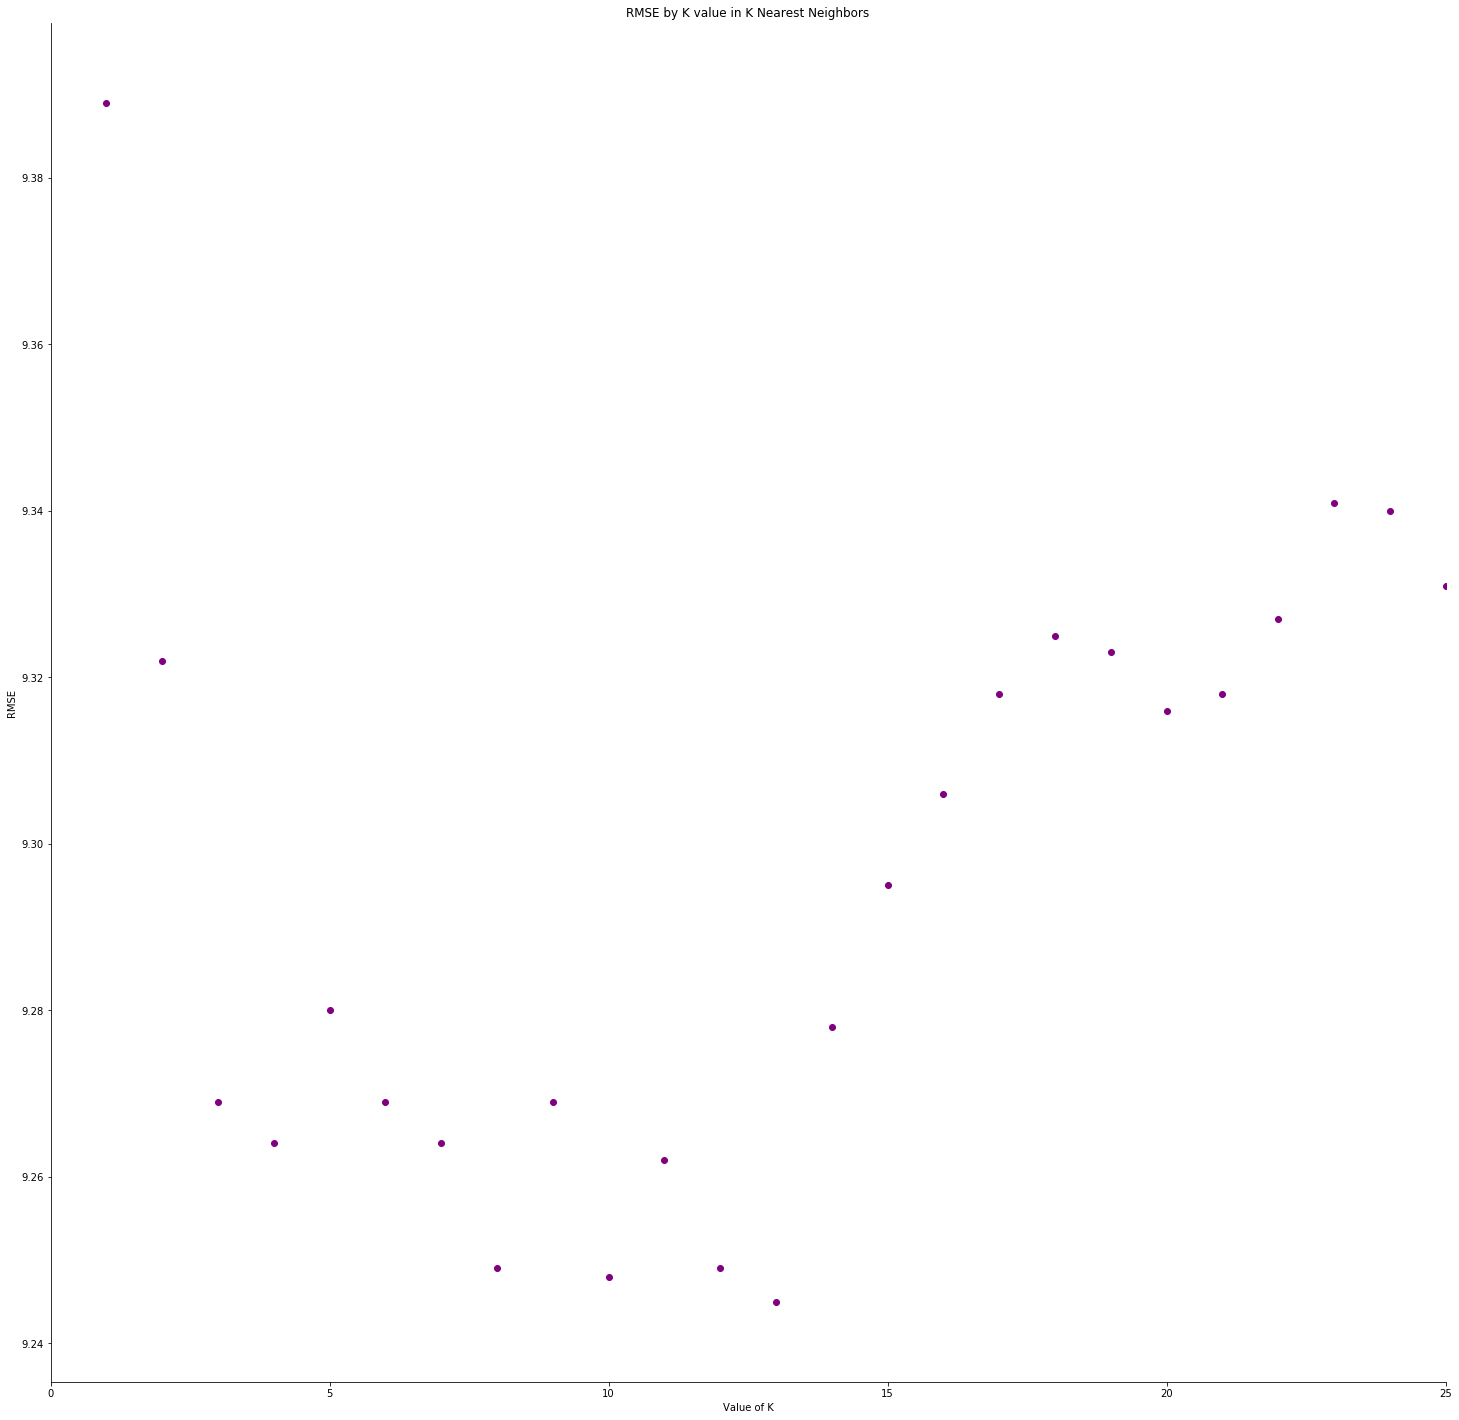

In [468]:
# create dictionary to hold the K and RMSE values
k_dict = {}
df_features = df[['CRIM','RM']]
# run 25 K values 
for x in range(1,26):
     k_dict[x] = Kcrossval(df_features, 2, 10, x)

Text(0.5,1,'RMSE by K value in K Nearest Neighbors')

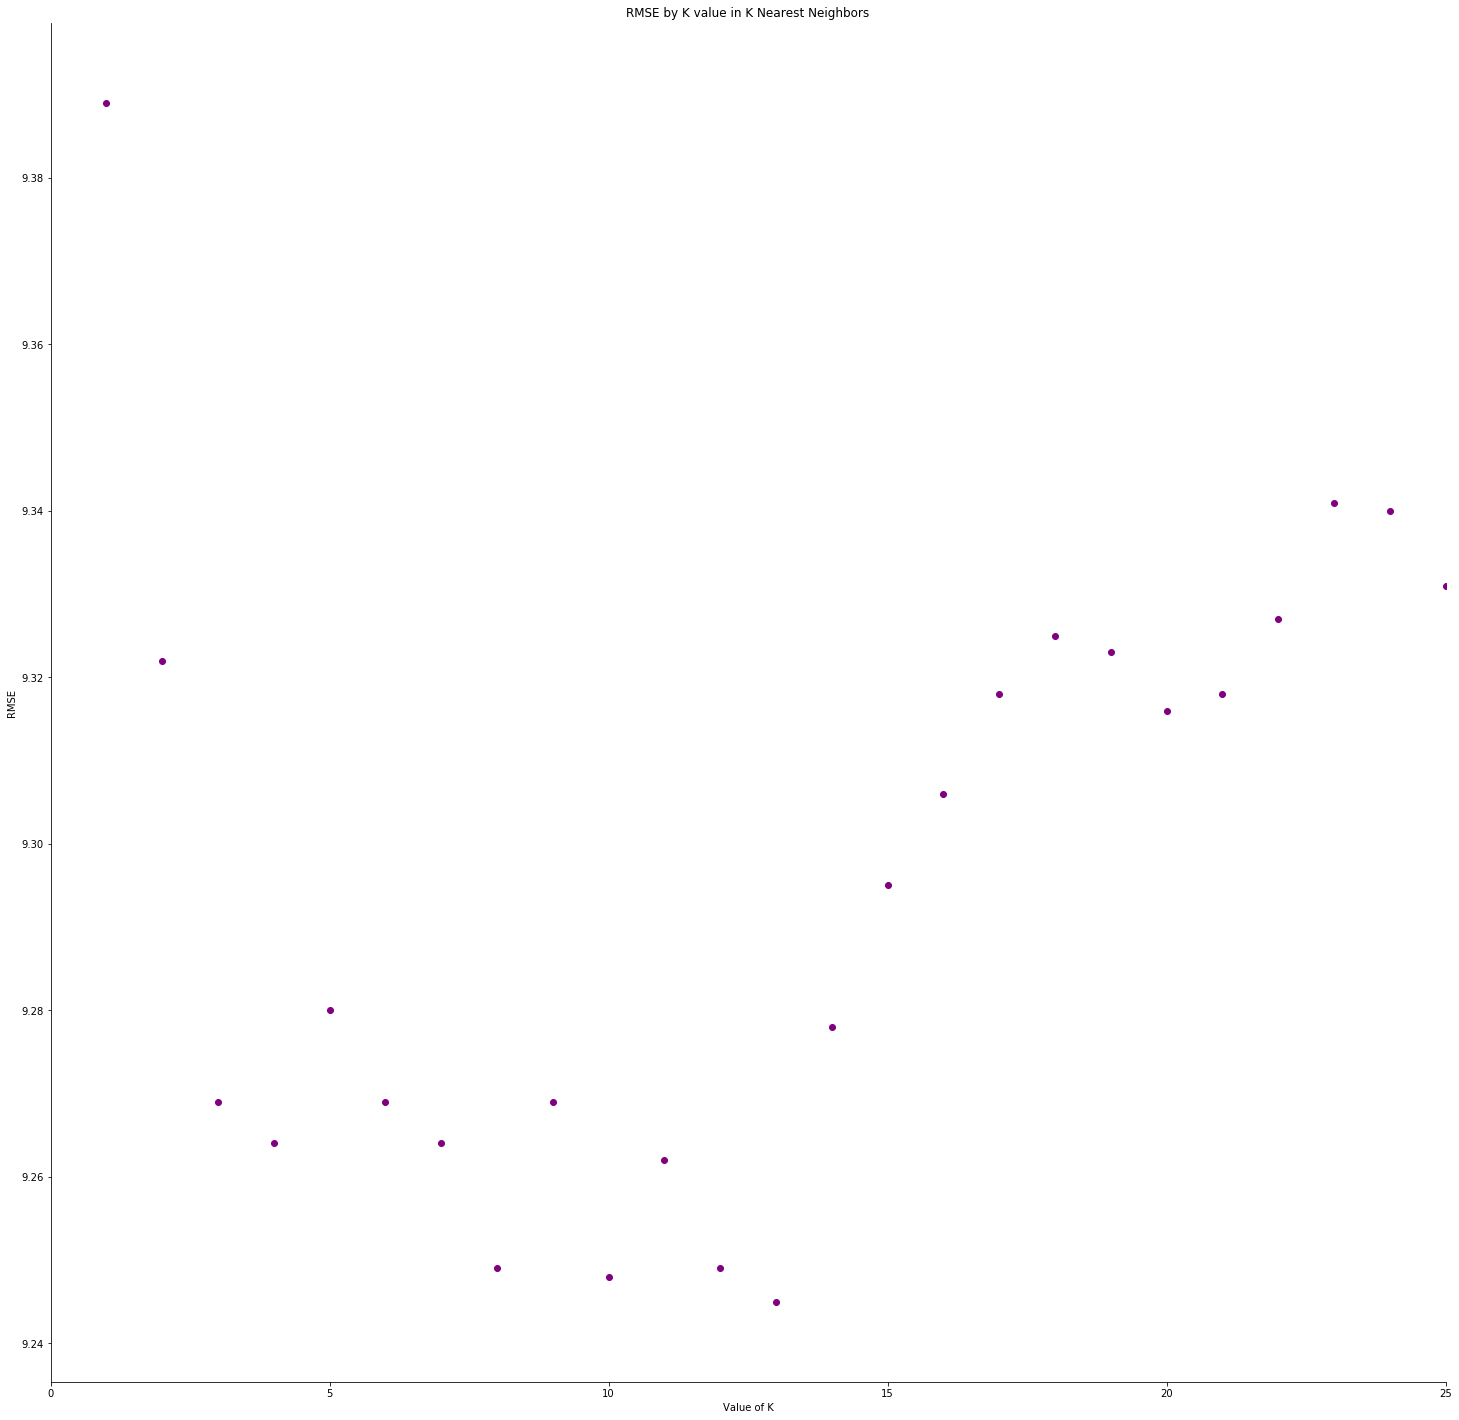

In [469]:
# create scatter plot of K values and RMSEs
plt.scatter(k_dict.keys(), k_dict.values(), color = 'purple')

# remove right and top borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(
    axis='both',     # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom='on',    # ticks along the bottom edge are on
    top='off',  # ticks along the top edge are off
    right = 'off',  # ticks along the right edge are off
    labelbottom='on')  # labels along the bottom edge are off
# set x axis limits
plt.gca().set_xlim([0,25])
# apply labels
plt.gca().set_xlabel('Value of K')
plt.gca().set_ylabel('RMSE')
plt.gca().set_title('RMSE by K value in K Nearest Neighbors')

It seems the more reasonable K values are around 3-14, before and after we have higher value of RMSE, especially as K increases. K=13 seems to be the best number. 